In [7]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [8]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

In [91]:
## 生成数据集
true_weight = [2, -3]
true_bias = 1.8

features = torch.randn(1000, 2, dtype=torch.float32)
labels = torch.mm(features, torch.tensor(true_weight, dtype=torch.float32).view((2,1))) + true_bias 
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.shape))
features.shape, labels.shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

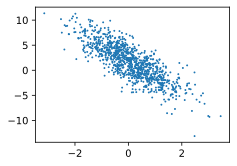

In [123]:
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [95]:
## 读取数据, 建立 batch_iter
def data_iter(bs, features=features, labels=labels):
    count = len(features)
    indices = list(range(count))
    random.shuffle(indices)
    for i in range(0, count, bs):
        index = torch.tensor(indices[i:i+bs])
        yield features[index,:], labels[index]
        
for i in data_iter(5):
    print(i)
    break

(tensor([[-0.7740, -1.4621],
        [-0.4283,  1.3174],
        [ 0.1499,  0.9789],
        [-0.5775, -1.2196],
        [-1.9408,  0.2018]]), tensor([[ 4.6407],
        [-3.0127],
        [-0.8378],
        [ 4.3127],
        [-2.6802]]))


In [98]:
w = torch.tensor(np.random.normal(0, 0.1, size=(2,1)), dtype=torch.float32, requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)

def linear_reg(x):
    return torch.mm(x, w) + b

def mse(y, y_hat):
    return ((y - y_hat.view(y.shape)) ** 2/2).sum()

def sgd(params, lr, bs):
    for param in params:
        param.data -= param.grad / bs * lr

In [121]:
## 训练
lr = 5e-1
epoch = 5
batch_size = 32
net = linear_reg
loss = mse

for i in range(epoch):
    for x, y in data_iter(batch_size):
        y_hat = net(x)
        l = loss(y, y_hat)
        l.backward()
        sgd([w, b], lr, batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_loss = loss(net(features), labels)
    print('epoch %s, loss %s' % ((i+1), train_loss.mean().item()))
        
    

epoch 1, loss 0.05035938322544098
epoch 2, loss 0.05026338994503021
epoch 3, loss 0.050646230578422546
epoch 4, loss 0.050472553819417953
epoch 5, loss 0.05024325102567673


In [122]:
print(true_weight, w)
print(true_bias, b)

[2, -3] tensor([[ 1.9989],
        [-2.9999]], requires_grad=True)
1.8 tensor([1.8006], requires_grad=True)
